**Name:**

**Due Date:**

# Instructions

Follow through the Leading Example section, and then complete the Your Turn section:
- Area Between Curves
- Volume
  - Disks/Washers
  - Shells
- Surface Area

Answer the Follow-Up Questions after each section by typing your answers under each question.

Type your name on the top of this lab.

Save this file as: `MTH151-Lab1-YOURNAME.ipynb`

If you are able to, feel free to convert the file to a pdf (this is an option on CoCalc, but not on Google Colab). Don't worry about it otherwise!

Submit this file on Canvas through the file upload for Lab 1. You can either submit the .pdf file or the .ipynb file. No other file types will be accepted.

# Leading Example

An interesting function that we'll look at several times this semester is $y=\sin(x^2)$. One of the most interesting features of this function is that while it is continuous for all real numbers, it does not have an "elementary" antiderivative: it has an antiderivative family, but it cannot be written down with our basic function types.

For this leading example, we'll investigate the area between $f(x) = \sin(x^2)$ and $g(x) = 2x$ on the interval $[0,2]$. Since $2x>\sin(x^2)$ on this interval, the integral expression that we would use is:
$$
\int_0^2 2x-\sin(x^2)\;dx
$$
Obviously this is a problem, since we can't integrate that by hand: we can't write down an antiderivative function for $\sin(x^2)$.

In this lab, we'll use Riemann sums to approximate integrals, and get good estimations of things like this area.

We'll need to import some python libraries, so make sure you include the following code at the beginning of your lab. Run the following chunk of code now, to include them.

In [0]:
import numpy as np
from matplotlib import pyplot as plt

Let's plot the two functions, to get a good visualization of the area we're considering. We'll plot $f(x) = \sin(x^2)$ and $g(x) = 2x$ on the interval $[0,2]$.

## Plot

We use the following code to plot the two functions $f$ and $f$ on the interval $[0,2]$.

First, I'll define $n=20$, and so $\Delta x=0.1$ for now, using the code `n = 20` and `delt_x = 2/n`. Then, using the `np.arange()` function, I've defined an interval of $x$-values from $0$ to $2$, counting up by $\Delta x$. Note that the `np.arange()` function does not "end" the interval at the second value -- instead, it counts as close as it can get without including or going past. That's why I've defined it to "end" at $2+\Delta x$

So, the code `np.arange(0,2, delt_x)` gives a list of values that looks like $\{0,  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,  1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9\}$. This is great for my Riemann sum! I'll use those kinds of values as my `xPartition`, since that will give me the *left-most* $x$-values from each subinterval/rectangle. 

For my graph, though, I'd like to plot this all the way up to *and including* 2. So the way to get around that is to use `np.arange(0,2+delt_x, delt_x)`. You'll notice I use `xVals = np.arange(0,2+delt_x, delt_x)` for graphing, while I use `xPartition = np.arange(0,2, delt_x)` for the Riemann sum.

After that, I define the functions $f(x)$ and $g(x)$. Note that the double asterisk, `**`, represents an exponent, so `x**2` is $x^2$. Also note that I need to call the sine function from the `numpy` library. We'll use this `np.` prefix for our trig functions, square roots, and even pi.

After that, I plot the functions (using the $x$-values I defined earlier), add a title to the graph, and display the graph using the last four lines.

The `plt.plot(x,y)` takes in some vector of $x$-values and corresponding $y$-values, and then plots those points.

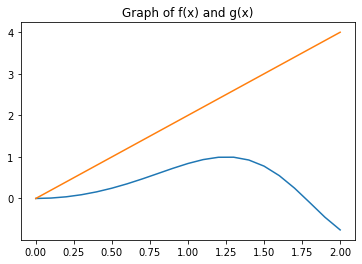

In [0]:
n = 20
delt_x = 2/n
xVals = np.arange(0,2+delt_x, delt_x)

def f(x):
    return np.sin(x**2)
def g(x):
    return 2*x

plt.plot(xVals, f(xVals))
plt.plot(xVals, g(xVals))
plt.title("Graph of f(x) and g(x)")
plt.show()

This give us a good picture of the graph, and get an idea of the area we're going to be looking at. Notice that there isn't an $x$-axis or $y$-axis plotted, but that's ok, since we still have the scale of the axes on the edges of our graph.

## Riemann Sum

Let's visualize the Riemann sums, in order to see what our calculation in a bit will be doing.

I want to start with the same plot as earlier (display both functions $f(x)$ and $g(x)$ on the interval of $x$-values we defined), but I want to add the rectangles for the Riemann sum.

I can do that using the `plt.bar()` command. Here is what the inputs to that command represent:

- `xInt` will be the $x$-value that defines the bar (so I have a bar at each partition value).
- `g(xInt)-f(xInt)` is the height of each bar.
- `width = delt_x` is saying that each bar has a width of $\Delta x$ (which is 0.1 for now). The default is 0.8.
- `bottom = f(xInt)` says that the bottom of each bar should be on the bottom function, $f(x)$. The default is 0, so each bar would sit on the $x$-axis.
- ` alpha=0.2` is a measure of transparency, so the bars will be pretty see-through.
- `edgecolor='blue'` is exactly what it sounds like: the border/edge of each bar will be blue.
- `align='edge'` defines how the bar meets up with the functions: the default is 'center,' but I want to use left-Riemann sums.


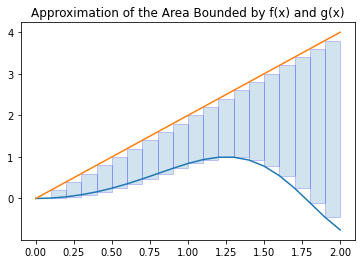

In [0]:
xPartition = np.arange(0,2, delt_x)

plt.plot(xVals, f(xVals))
plt.plot(xVals, g(xVals))
plt.bar(xPartition, g(xPartition)-f(xPartition), width = delt_x, bottom = f(xPartition),
        alpha=0.2, edgecolor='blue', align='edge')

plt.title("Approximation of the Area Bounded by f(x) and g(x)")

plt.show()

Here is our Riemann Sum! Looks great!

## Approximation of the Area

Ok, let's approximate the area between these curves. 

We know that if $\Delta x = 0.1$, then we have $n = \dfrac{b-a}{\Delta x} = \dfrac{2}{0.1}=200$. So our Riemann sum for this area should be:
$$
0.1 \sum_{k=1}^{200} g(x_k^*)-f(x_k^*)
$$
where $x_k^*$ is the $x$-value representative for the $k$th subinterval. Below, we write this out in python, and evaluate our Riemann sum.

We use the code below to calculate the approximation found by the Riemann sum we've built.

In [0]:
area = delt_x*sum(g(xPartition) - f(xPartition))
print(area)

2.959570579971672


# Your Turn

Alright, time to set you loose! We'll look at 3 different applications of the definite integral:
- Area Between Curves (similar to the Leading Example)
- Volume (2 ways)
  - Disks/Washers
  - Shells
- Surface Area

## Area Between Curves

Re-write and edit the code from the Leading Example above to approximate the area between the functions $f(x) = \cos(x^2)$ and $g(x) = \frac{x}{2}+1$ on the interval $[0,3]$.

Make sure that your Riemann sum has $n>1000$ rectangles, to make sure that the approximation is "good". Note that this will impact your value of $\Delta x$, which means that your vector of $x$-values will be impacted as well (since you'll have more partition points).

In [0]:
# Use this chunk of code to graph the two functions on the interval.


In [0]:
# Use this chunk of code to add the Riemann sum rectangles to your plot.

In [0]:
# Use this chunk of code to actually calculate the area that the Riemann sum 
# is using to approximate the actual area.


### Follow-Up Questions

*Include your answers underneath each question.*

--------

1. *How good is this approximation? In your answer, refer to your graph

2. *How could you make this approximation better? What are the drawbacks of your approach? HINT: try it yourself!*


---------



## Volume

Finding the area between curves using definite integrals was not a hard concept to get: we could have tackled that in our first semester of calculus most likely! We mostly use it here as a way of brushing up on Riemann sums, so that we can apply them to find other measurements. One of those measurements is the volume of some 3-dimensional object.

For now, we'll consider the region above: bounded by the functions $f(x) = \cos(x^2)$ and $g(x) = \frac{x}{2}+1$ on the interval $[0,3]$. We'll revolve this region around the $x$-axis as well as the $y$-axis, and try to find the volume of each solid.

### Disks/Washers

Recall our integral formula for volumes by washers:

> For $g(x)\geq f(x)$ on $[a,b]$, the volume of the region bounded by $f$ and $g$ on $[a,b]$ revolved around the $x$-axis is:
> $$V = \pi\int_a^b \left( g(x)^2 - f(x)^2\right)\;dx$$

Consider the region bounded by the functions $f(x)=\cos(x^2)$ and $g(x)=\frac{x}{2}+1$ on the interval $[0,3]$ revolved around the $x$-axis.

Plot, first, the region that will be revolved. Add the rectangular cross-sections, again, as you did with the Area Between Curves. This time, though, plot it with $n=10$ rectangles. Note that this will impact your value of $\Delta x$, which means that your vector of $x$-values will be impacted as well.

In [0]:
# Use this chunk to plot the region you'll be revolving, as well as n=10 rectangular cross-sections.


Remember, for the approximation of the volume using the washer method, we will consider the volume of the $k$th slice: $V_k = \pi(g(x)^2-f(x)^2)\Delta x$.

Then the approximation of the volume of the whole solid is the sum of the $k$ slices: 
$$V \approx \displaystyle \sum_{k=1}^{10} V_k = \pi \sum_{k=1}^{10} \left(g(x)^2 - f(x)^2\right)\Delta x = \pi\Delta x \sum_{k=1}^{10} \left( g(x)^2-f(x)^2\right)$$

Write out some code to approximate this volume, using this Riemann Sum.

In [0]:
# Use this chunk of code to approximate the volume using n=10 washers.


Now let $n>1000$ slices, and repeat the process. Note again that $\Delta x$ will change, but the general form of the Riemann Sum won't:

$$V \approx \pi\Delta x \sum_{k=1}^n\left(g(x)^2 - f(x)^2\right)$$

In [0]:
# Use this chunk of code to approximate the volume using n>1000 washers.


### Shells

Recall our integral formula for volumes by shells:

> For $g(x)\geq f(x)$ on $[a,b]$, the volume of the region bounded by $f$ and $g$ on $[a,b]$ revolved around the $y$-axis is:
> $$V = 2\pi\int_a^b x\left(g(x)-f(x)\right)\;dx$$

Consider (again) the region bounded by the functions $f(x)=\cos(x^2)$ and $g(x)=\frac{x}{2}+1$ on the interval $[0,3]$, but this time revolved around the $y$-axis.

You can refer to your plot above with $n=10$ rectangles between the two curves.

Remember, for the approximation of the volume using the shell method, we will consider the volume of the $k$th slice: $V_k = 2\pi x(g(x)-f(x))\Delta x$.

Then the approximation of the volume of the whole solid is the sum of the $k$ slices: 
$$V \approx \displaystyle \sum_{k=1}^{10} V_k = 2\pi \sum_{k=1}^{10} \left(g(x) - f(x)\right)\Delta x = 2\pi\Delta x \sum_{k=1}^{10} \left( g(x)-f(x)\right)$$

Write out some code to approximate this volume, using this Riemann Sum.

In [0]:
# Use this chunk of code to approximate the volume using n=10 shells.


Now try using more slices ($n>1000$ again).

In [0]:
# Use this chunk of code to approximate the volume using n>1000 shells.


### Follow-Up Questions

*Include your answers underneath each question.*

--------

3. *When $n$ increased, what happened with the volumes (in the washer method and the shell method)? Interpret this.*


4. *Would you be comfortable using $n=10$ slices in these estimations? Why or why not?*

---------



## Surface Area

It's not hard to come up with examples where evaluating the integral for surface area of a solid of revolution is extremely difficult.

Again, though, we'll use one of these functions that we have a hard time integrating by itself.

Let's consider the region bounded by the $x$-axis and the function $h(x) = \tan(x^2)$ on the interval $[-1,1]$. Go ahead and plot the function $h$ on the interval $[-1,1]$ below. You don't need to add any Riemann sums to the plot, but it'll still be good to see the function in orer to visualize the solid we're forming. Define $\Delta x$ while you're setting up your interval of $x$-values so that $n>1000$ again.

In [0]:
# # Use this chunk of code to graph the function h(x) on the interval [-1,1].


Recall the integral formula for surface area:

> If $h(x) \geq 0$ on $[a,b]$, then the surface area of the solid formed when we revolved the region bounded by $h$ and the $x$-axis on $[a,b]$ around the $x$-axis is:
> $$ A  = 2\pi\int_a^b h(x)\sqrt{1+h'(x)^2}\;dx$$

Note that you'll need $h'(x)$. Define it below. You won't be able to call it `h'(x)`, so pick something like `h-prime(x)` or `dhdx(x)`. Note also that the `numpy` package does not have a secant function, so `np.sec()` won't be recognized.

In [0]:
# Use this chunk of code to define h'(x).


Now we'll set up the Riemann Sum for approximating the surface area. Remember, you'll need to define a set of $x$-values to use as your partition of the interval $[-1,1]$, and use the following Riemann Sum formula:

$$ A \approx 2 \pi \Delta x \sum_{k=1}^n h(x)\sqrt{1+h'(x)^2}$$

For the square root, use the function `np.sqrt()`.

In [0]:
# Use this chunk of code to approximate the surface area using n>1000 slices.


### Follow-Up Questions

*Include your answers underneath each question.*

--------

5. *What do you think is the biggest benefit to performing a process like this using a programming language? Explain.*

---------

